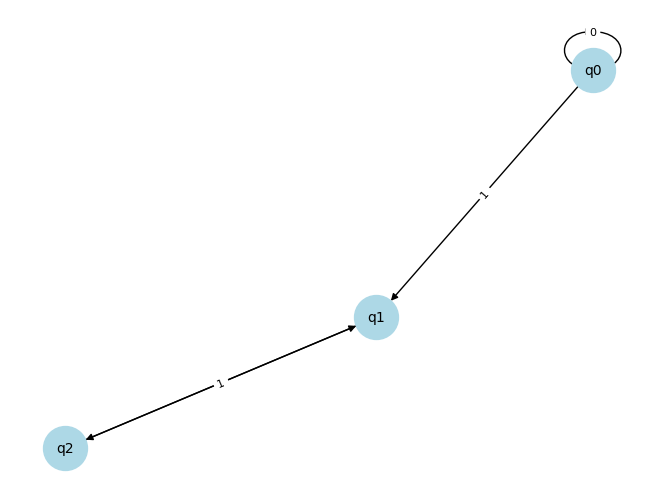

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# Define el autómata (ejemplo de AFD)
G = nx.DiGraph()
G.add_nodes_from(['q0', 'q1', 'q2'])
G.add_edges_from([('q0', 'q0'), ('q0', 'q1'), ('q1', 'q2'), ('q2', 'q1')])

# Etiquetas de las transiciones
labels = {('q0', 'q0'): '0', ('q0', 'q1'): '1', ('q1', 'q2'): '0', ('q2', 'q1'): '1'}

# Dibuja el autómata con etiquetas
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

plt.savefig("automata_con_transiciones.png")
plt.show()


In [4]:
from cmp.automata import State
from cmp.tools.regex import Regex

# Tengo dos tipos de tokens a reconocer
#   1. Caracteres numericos
nonzero_digits = '|'.join(str(n) for n in range(1,10))
#   2. El for de toda la vida
for_regex = 'for'

# Creo los autómatas que los reconocen
# Que según lo que entendi en la cp eran estados
a = State.from_nfa(Regex(f'({nonzero_digits})(0|{nonzero_digits})*').automaton)
c = State.from_nfa(Regex(for_regex).automaton)

# Luego creo otro estado y le añado epsilon transiciones
# a cada autómata que creé, para tener el autómata de ese lexer
autom = State('hola')
autom.add_epsilon_transition(a)
autom.add_epsilon_transition(c)

# Lo convierto a determinista
autom1 = autom.to_deterministic()

text = '123'
print(autom1)

# Recorro los estados que me llevan a reconocer la cadena
for w in text:
    if isinstance(autom1.state,tuple):
        autom1 = State.move_by_state(w,*autom1.state)
    else:
        autom1 = State.move_by_state(w,autom1.state)
    print(autom1)


(0, 2, hola)
1


AttributeError: 'int' object has no attribute 'has_transition'

In [6]:
arr = [1,2,3]

print(39 in arr)

False
